# 4. COMPARING MEANS OF DIFFERENT POPULATIONS

There are 2 varieties of terrestrial peach: Georgia peach and Yangshan peach. We want a very specific idea of the expected yield from both. We will check if there is not great difference between the expected yields.

The comparison of two independent population means is a common practice to test the hypothesis that the two populations differ from each other. 

Let's assume that x̄ (Georgia) and ȳ (Yangshan) are the means of two populations of size $n_x$ (500) and $n_y$ (300) respectively. If x and y are normal or sizes are sufficiently large for the Central Limit Theorem to hold, then x̄ – ȳ has a normal distribution with mean μx – μy and standard deviation:


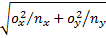

Since our sample sizes are sufficiently large, we can use the above theorem to compare our population means. The theorem requires that the population standard deviations be known, and in our case they can be calculated easily. If the sample sizes were smaller and/or the variance wasn't known, we would have used t-test. Though, for this example, we employ z-test.

We start off by reading the file and preparing the dataset:

In [ ]:
# Read the csv file
if os.path.exists("Georgiapeaches.csv"): 
  georgia = pd.read_csv("Georgiapeaches.csv")
if os.path.exists("Yangshanpeaches.csv"):
  yangshan = pd.read_csv("Yangshanpeaches.csv")

In [ ]:
# Prepare data
x = georgia['Yield per investment (in kilograms per Martian dollar)'].to_numpy()
y = yangshan['Yield per investment (in kilograms per Martian dollar)'].to_numpy()

Now we set the null and alternative hypothesis.

$H_0:  μ_x = μ_y $ 

against the alternative one:

$H_1: μ_x \neq μ_y $ 

The inequality indicates a two-tailed test. It is now time to calculate the z-score in order to find the difference between the sample means based on a normal population with a known standard deviation. Our formula is as following:

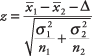

Where $x̄_1$ and $x̄_2$ are means of the populations and Δ is the difference between the means. Our null hypothesis suggests that this difference is 0. 

We now prepare the variables to put into the equation:

In [ ]:
mean_x = np.mean(x)
mean_y = np.mean(y)

sdx = np.std(x)
sdy = np.std(y)

n1 = x.size
n2 = y.size

#this is a helper variable to make the calculation cleaner
i = (np.square(sdx) / n1) + (np.square(sdy) / n2)

Since we have everything ready, we can now plug the variables into the equation:

In [ ]:
#calculating the test statistic

z = (mean_x - mean_y) / np.sqrt(i)
print (z)

-0.6346211020598123


Our z‐value is negative because the (larger) mean for Yangshan peaches was subtracted from the (smaller) mean for Georgia peaches. But since the hypothesized difference between the populations is 0, (meaning the order of the samples in this computation is arbitrary) the equation could just as well have been the other way, in which case z would be 0.6346 instead of –0.6346. An extreme z‐score in either tail of the distribution (positive or negative) would lead to rejection of the null hypothesis nevertheless.

**P-value**

The area of the standard normal curve corresponding to a z‐score of –0.6346 is 0.26435. Because this test is two‐tailed, that figure is doubled to yield a probability of 0.5287 that the population means are the same.

**Confidence Intervals**
Since both sample sizes are greater than 30, we can use the z-table:

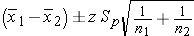

And calculate the confidence intervals accordingly. For the sake of simplicity, we will use scipy's stats library and calculate each confidence interval automatically:

In [ ]:
import scipy.stats as st
from scipy.stats import ttest_ind, ttest_ind_from_stats

In [ ]:
# 90%
ci_x1 = st.t.interval(0.90, n1-1, loc=mean_x, scale=st.sem(x))
ci_y1 = st.t.interval(0.90, n2-1, loc=mean_y, scale=st.sem(y))
print ("The 90% confidence interval for Georgian peaches:", ci_x1)
print ("The 90% confidence interval for Yangshan peaches:", ci_y1)

The 90% confidence interval for Georgian peaches: (1.919798259712307, 2.022408940287693)
The 90% confidence interval for Yangshan peaches: (1.956436345407627, 2.0355929879257064)


In [ ]:
# 95%
ci_x2 = st.t.interval(0.95, n1-1, loc=mean_x, scale=st.sem(x))
ci_y2 = st.t.interval(0.95, n2-1, loc=mean_y, scale=st.sem(y))
print ("The 95% confidence interval for Georgian peaches:", ci_x2)
print ("The 95% confidence interval for Yangshan peaches:", ci_y2)

The 95% confidence interval for Georgian peaches: (1.9099346481482304, 2.0322725518517695)
The 95% confidence interval for Yangshan peaches: (1.9488092311387788, 2.0432201021945544)


In [ ]:

# 99%
ci_x3 = st.t.interval(0.99, n1-1, loc=mean_x, scale=st.sem(x))
ci_y3 = st.t.interval(0.99, n2-1, loc=mean_y, scale=st.sem(y))
print ("The 99% confidence interval for Georgian peaches:", ci_x3)
print ("The 99% confidence interval for Yangshan peaches:", ci_y3)

The 99% confidence interval for Georgian peaches: (1.8906010935550766, 2.051606106444923)
The 99% confidence interval for Yangshan peaches: (1.9338305115296268, 2.0581988218037064)


If our test had been conducted at a pre‐specified significance level of α < 0.05, the null hypothesis that assumed the two means as equal could not be rejected due to the fact that our p-value was greater than 0.05, which is the least strict level. At none of the levels our test would result in the rejection of the null hypothesis, therefore there is not enough evidence to suggest that these two types do not have same yields. 

We suggest growing both to offer variety to Martian consumers.